# Лабораторная работа №1. 

Данная лабораторная работа состоит из нескольких блоков. В каждом блоке вам предлагается произвести некоторые манипуляции с данными и сделать некоторые выводы.
* Задавать вопросы можно и нужно.
* Списывать не нужно. Работы, которые были списаны обнуляются.
* Блоки выполняются последовательно и оцениваются отдельно.

## Часть 1. Работа с моделями и ансамблями моделей в задачи классификации.

### 1. Чтение данных.
Воспользуемся [датасетом](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), в котором описываются различные автомобили. Будем решать задачу многоклассовой ($k=4$) классификации.
Для удобства, датасет уже преобразован в удобный формат.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


In [2]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import roc_curve

from sklearn.decomposition import PCA

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

/home/roma/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Для первичного анализа может быть полезна библиотека `pandas`. Преобразуем `train` выборку в `pd.DataFrame`.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,773,87,42,70,139,59,7,149,45,19,142,177,327,156,78,6,9,185,188
1,171,106,54,103,161,47,4,247,27,27,166,266,892,242,85,4,11,181,183
2,807,103,51,105,174,56,11,210,32,24,163,222,650,222,73,8,9,187,196
3,845,85,36,66,123,55,5,120,56,17,128,140,212,131,73,1,18,186,190
4,676,82,43,73,158,68,7,151,44,19,145,181,337,173,80,2,17,183,188
5,806,88,45,82,155,56,8,154,43,19,149,180,357,170,69,3,0,188,193
6,825,86,39,84,149,57,8,156,43,20,133,185,358,157,74,0,23,183,190
7,672,97,47,88,183,60,7,197,33,23,148,214,596,201,74,8,0,192,191
8,333,86,42,65,125,54,7,150,45,19,140,171,327,172,85,2,8,180,182
9,330,98,44,78,160,63,8,142,47,18,148,160,300,171,63,19,2,201,207


Воспользовавшись методами `describe` и `info` можно получить полезную информацию о датасете.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,426.528233,93.854281,44.832423,82.265938,168.735883,61.484517,8.559199,169.367942,40.826958,20.626594,147.925319,189.153005,442.950820,174.298725,72.570128,6.369763,12.744991,188.970856,195.555556
std,244.778191,8.281800,6.233091,15.846387,32.946503,7.754810,4.888413,33.642812,7.872682,2.626525,14.795808,31.488938,179.252257,33.078954,7.537080,4.990856,9.060452,6.210060,7.536475
min,0.000000,76.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,112.000000,60.000000,0.000000,0.000000,176.000000,182.000000
25%,219.000000,88.000000,40.000000,70.000000,141.000000,56.000000,6.000000,147.000000,33.000000,19.000000,136.000000,167.000000,318.000000,148.000000,67.000000,2.000000,5.000000,184.000000,190.000000
50%,435.000000,93.000000,44.000000,79.000000,168.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,179.000000,366.000000,173.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,637.000000,100.000000,50.000000,98.000000,194.000000,65.000000,10.000000,199.000000,46.000000,23.000000,160.000000,217.000000,596.000000,198.000000,76.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,306.000000,126.000000,55.000000,265.000000,61.000000,29.000000,188.000000,288.000000,1018.000000,268.000000,127.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
0     549 non-null int64
1     549 non-null int64
2     549 non-null int64
3     549 non-null int64
4     549 non-null int64
5     549 non-null int64
6     549 non-null int64
7     549 non-null int64
8     549 non-null int64
9     549 non-null int64
10    549 non-null int64
11    549 non-null int64
12    549 non-null int64
13    549 non-null int64
14    549 non-null int64
15    549 non-null int64
16    549 non-null int64
17    549 non-null int64
18    549 non-null int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Работа с данными, построение модели, анализ ошибки.
Выполните следующие манипуляции с данными:

#### 2.0. Предобработка данных.
* Произведите необходимые (по вашему мнению) манипуляции с данными и объясните их.

In [6]:
### YOUR CODE HERE

X_mean = X_train.mean(axis=0)
X_std  = X_train.std (axis=0)

X_train = (X_train - X_mean) / X_std
X_test  = (X_test  - X_mean) / X_std

In [7]:
Y_train_pd = pd.DataFrame(Y_train)
Y_test_pd  = pd.DataFrame(Y_test)

unique_cars = {'van' : 0, 'saab' : 1, 'bus' : 2, 'opel' : 3}

Y_train_pd.replace(unique_cars, inplace = True)
Y_test_pd .replace(unique_cars, inplace = True)

Y_train = Y_train_pd.as_matrix().squeeze(1)
Y_test  = Y_test_pd .as_matrix().squeeze(1)

/home/roma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  if __name__ == '__main__':
/home/roma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  # Remove the CWD from sys.path while we load stuff.


In [8]:
print (X_train.shape)
print (Y_train.shape)
print (X_test .shape)
print (Y_test .shape)

(549, 19)
(549,)
(297, 19)
(297,)


#### 2.1. Базовая логистическая регрессия.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на train-датасете (е переусердствуйте с подбором, в данной работе не стоит задача найти самую оптимальную модель. Небольшого grid/random search'а хватит).

* Постройте график ROC-кривой для данного классификатора (`sklearn.metrics.roc_curve`), оцените точность классификации и f1-score. 

In [9]:
### YOUR CODE HERE

clf = LogisticRegression ()
clf.fit (X_train, Y_train)

param_grid = {'C'      : np.linspace(0.01, 1, 10),
              'penalty': ['l1', 'l2']}
grid_cv = GridSearchCV (clf, param_grid, scoring='accuracy', cv=5)
grid_cv.fit (X_train, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [10]:
print(grid_cv.best_params_)
print(grid_cv.score(X_test, Y_test))

{'C': 1.0, 'penalty': 'l1'}
0.8114478114478114


In [11]:
best_lin_clf = LogisticRegression(C      =grid_cv.best_params_['C'],
                              penalty=grid_cv.best_params_['penalty'])

best_lin_clf.fit (X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

### Определим самый многочисленный класс

In [12]:
n_examples = np.array ([0, 0, 0, 0])
for i in range (Y_test.shape[0]):
    n_examples[Y_test[i]] += 1
    
largest_class = 0
for i in range (4):
    if n_examples[i] > n_examples[largest_class]:
        largest_class = i

print (n_examples)
print ('largest_class = ', largest_class)

[79 72 72 74]
largest_class =  0


In [13]:
def show_ROC (model, X, Y):
    
    prediction = model.predict_proba(X)
    roc_stuff = []
    for i in range(prediction.shape[1]):
        roc_stuff.append (roc_curve(Y, prediction[:, i], pos_label=i))

#     print (len(roc_stuff[0][1]), len(roc_stuff[1][1]), len(roc_stuff[2][1]), len(roc_stuff[3][1]))

    # plot 1 fpr
    fig1 = plt.figure(figsize=(10, 6))

    axes = fig1.add_axes([0.1, 0.1, 0.8, 0.8])

    axes.plot(roc_stuff[0][2], roc_stuff[0][0], color='r')
    axes.plot(roc_stuff[1][2], roc_stuff[1][0], color='b')
    axes.plot(roc_stuff[2][2], roc_stuff[2][0], color='g')
    axes.plot(roc_stuff[3][2], roc_stuff[3][0], color='y')

    axes.set_xlabel('threshold')
    axes.set_ylabel('fpr')
    
    plt.show()
    
    # plot 2 tpr
    fig = plt.figure(figsize=(10, 6))

    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

    axes.plot(roc_stuff[0][2], roc_stuff[0][1], color='r')
    axes.plot(roc_stuff[1][2], roc_stuff[1][1], color='b')
    axes.plot(roc_stuff[2][2], roc_stuff[2][1], color='g')
    axes.plot(roc_stuff[3][2], roc_stuff[3][1], color='y')
    
    axes.set_xlabel('threshold')
    axes.set_ylabel('tpr')

    plt.show()

    # plot 3 ROC-curve
    fig = plt.figure(figsize=(8, 8))

    axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

#     axes.plot(fpr, tpr, 'r', marker = '^')
    axes.plot(roc_stuff[0][0], roc_stuff[0][1], color='r', marker='.')
    axes.plot(roc_stuff[1][0], roc_stuff[1][1], color='b', marker='.')
    axes.plot(roc_stuff[2][0], roc_stuff[2][1], color='g', marker='.')
    axes.plot(roc_stuff[3][0], roc_stuff[3][1], color='y', marker='.')
    axes.plot (range(2), range(2), 'grey', ls='--')

    axes.set_xlabel('FPR')
    axes.set_ylabel('TPR (recall)')
    axes.set_title('ROC-curve')

    plt.show()
    
    prediction_classes = model.predict(X)
    print("F1_score: ", f1_score(Y, prediction_classes, average = None))

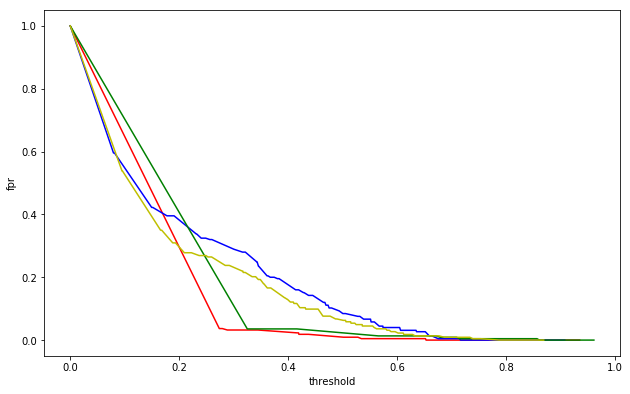

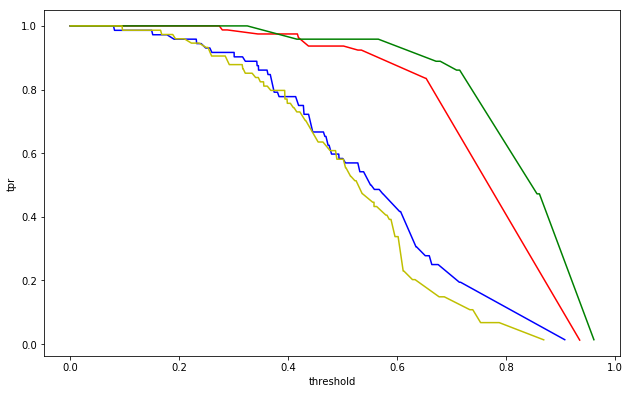

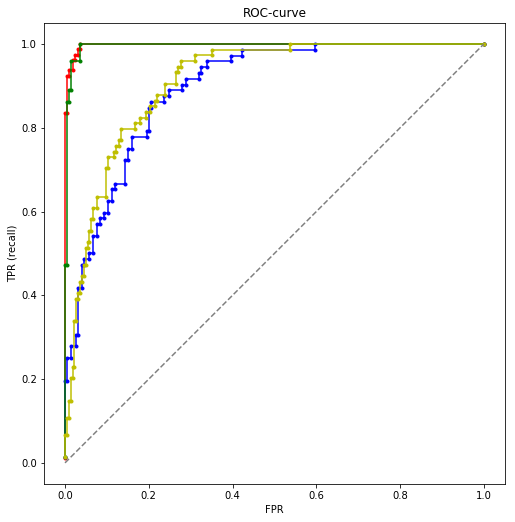

F1_score:  [0.95       0.66666667 0.93243243 0.67605634]


In [14]:
show_ROC (best_lin_clf, X_test, Y_test)

#### 2.2. Зависимость объясненной дисперсии от числа главных компонент.
Воспользуемся методом главных компонент (PCA). 

Примените его к train-части данных.
Постройте график зависимости объясненной дисперсии (explained variance ratio) от количества главных компонент.

In [15]:
### YOUR CODE HERE

var = []
for n_components in range (1, X_train.shape[1] + 1):
    pca = PCA (n_components=n_components)
    pca.fit (X_train)
#     print(n_components, pca.explained_variance_ratio_)
    var.append (pca.explained_variance_ratio_.mean())


Text(0,0.5,'mean variance')

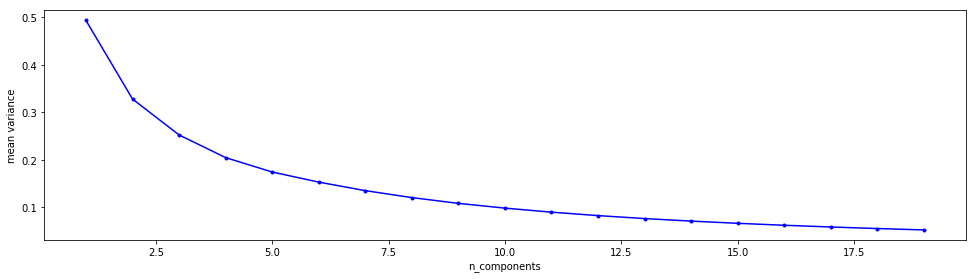

In [16]:

# plot 3 ROC-curve
fig = plt.figure(figsize=(16, 4))

axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(range(1, X_train.shape[1] + 1), var, 'b', marker = '.')

axes.set_xlabel('n_components')
axes.set_ylabel('mean variance')


#### 2.3. Преобразование с помощью PCA.
Выберите определенное число компонент. Кратко опишите, чем обусловлен ваш выбор.

Используя эти главные компоненты, преобразуйте train и test выборки (используя методы `fit` и `transform`).

#### Выберу 8

In [17]:
### YOUR CODE HERE
my_n_components = 8

my_pca = PCA (n_components=my_n_components)

my_pca.fit (X_train)

X_train_pca = my_pca.transform (X_train)
X_test_pca  = my_pca.transform (X_test)

print ('before', X_train.shape, 'after', X_train_pca.shape)
print ('before', X_test .shape, 'after', X_test_pca .shape)



before (549, 19) after (549, 8)
before (297, 19) after (297, 8)


#### 2.4. Логистическая регрессия над преобразованными данными.
* Подберите оптимальные параметры логистической регресии с помощью кросс-валидации на преобразованном train-датасете.

* Постройте график ROC-кривой для полученных классификаторов, оцените точность классификации и f1-score. 

In [18]:
### YOUR CODE HERE

lin_clf_pca = LogisticRegression ()
lin_clf_pca.fit (X_train_pca, Y_train)

param_grid = {'C'      : np.linspace(0.01, 1, 10),
              'penalty': ['l1', 'l2']}
grid_cv = GridSearchCV (lin_clf_pca, param_grid, scoring='accuracy', cv=5)
grid_cv.fit (X_train_pca, Y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [19]:
print(grid_cv.best_params_)
print(grid_cv.score(X_test_pca, Y_test))

{'C': 0.23, 'penalty': 'l1'}
0.632996632996633


In [20]:
best_lin_clf_pca = LogisticRegression(C      =grid_cv.best_params_['C'],
                                      penalty=grid_cv.best_params_['penalty'])

best_lin_clf_pca.fit (X_train_pca, Y_train)

LogisticRegression(C=0.23, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

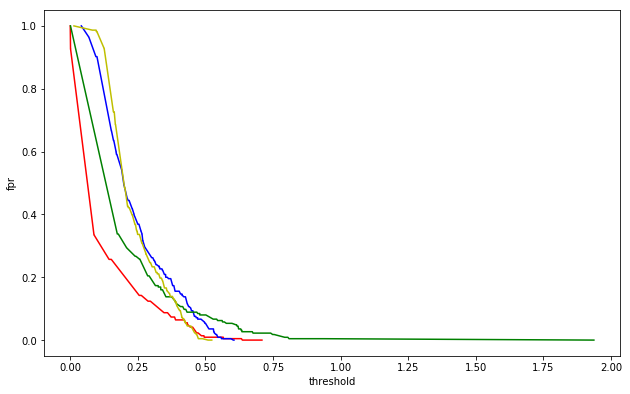

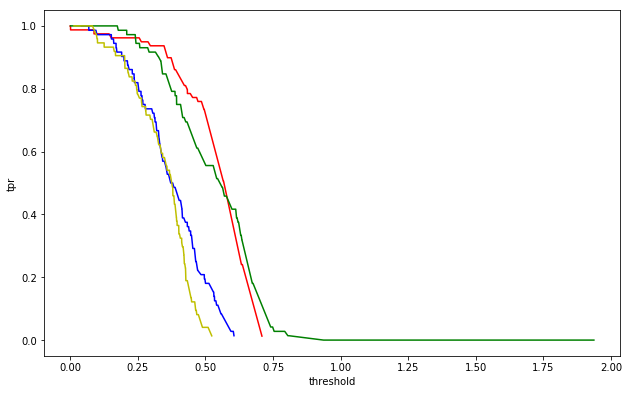

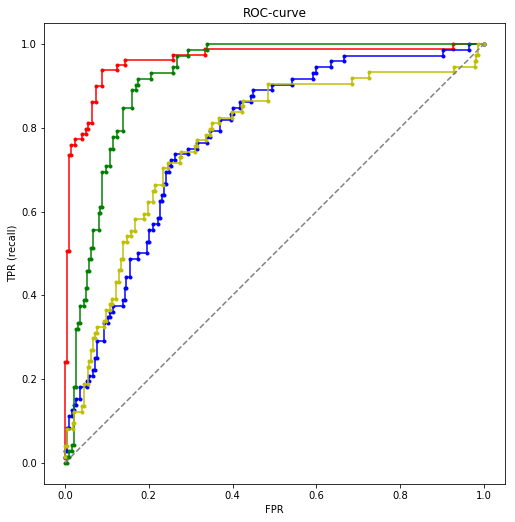

F1_score:  [0.84705882 0.47619048 0.73809524 0.34862385]


In [21]:
show_ROC (best_lin_clf_pca, X_test_pca, Y_test)

#### 2.5. Решающее дерево.
Рассмотрим поведение решающего дерева на исходных и преобразованных данных. Будем варьировать лишь один параметр - максимальную глубину дерева. 

* С помощью кросс-валидации подберите оптимальный параметр `max_depth` и оцените на исходных и преобразованных данных те же метрики, что и выше.

In [22]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
tree_clf     = DecisionTreeClassifier ()
tree_clf_pca = DecisionTreeClassifier ()
tree_clf    .fit (X_train,     Y_train)
tree_clf_pca.fit (X_train_pca, Y_train)

param_grid = {'max_depth': np.linspace(1, 50, 50)}

grid_cv = GridSearchCV (tree_clf, param_grid, scoring='accuracy', cv=5)
grid_cv.fit (X_train, Y_train)

grid_cv_pca = GridSearchCV (tree_clf_pca, param_grid, scoring='accuracy', cv=5)
grid_cv_pca.fit (X_train_pca, Y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50.])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [23]:
print(grid_cv.best_params_)
print(grid_cv.score(X_test, Y_test))

print(grid_cv_pca.best_params_)
print(grid_cv_pca.score(X_test_pca, Y_test))

{'max_depth': 19.0}
0.6936026936026936
{'max_depth': 6.0}
0.6127946127946128


In [24]:
best_tree_clf     = DecisionTreeClassifier(max_depth=grid_cv.best_params_['max_depth'])
best_tree_clf    .fit (X_train, Y_train)

best_tree_clf_pca = DecisionTreeClassifier(max_depth=grid_cv_pca.best_params_['max_depth'])
best_tree_clf_pca.fit (X_train_pca, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6.0,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

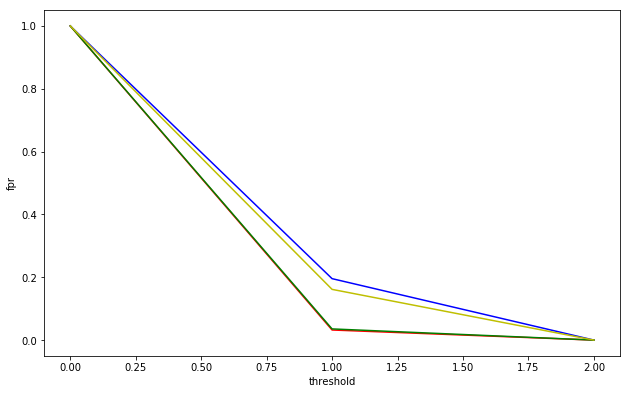

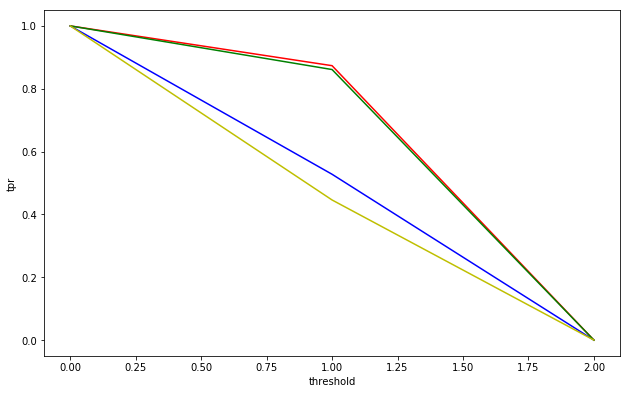

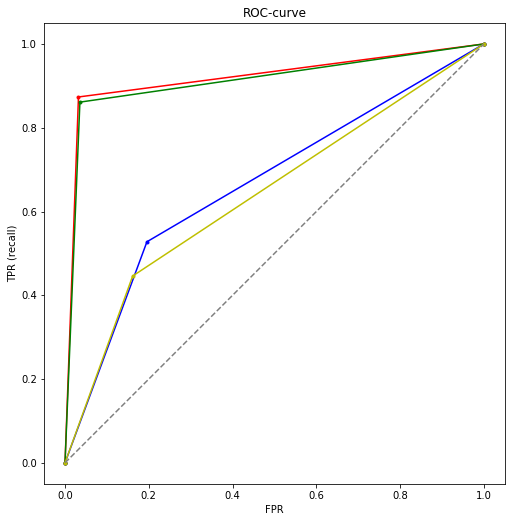

F1_score:  [0.89032258 0.49350649 0.87323944 0.46153846]


In [25]:
show_ROC (best_tree_clf, X_test, Y_test)

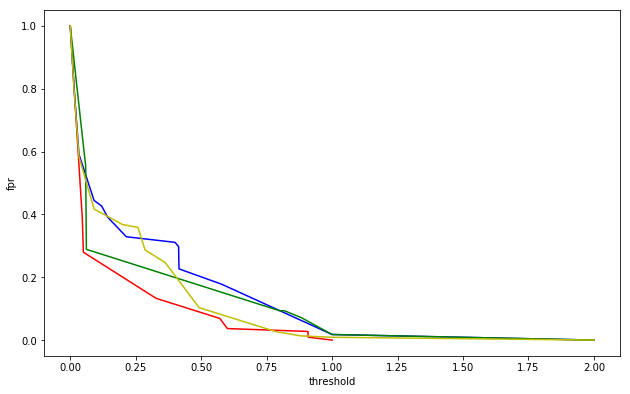

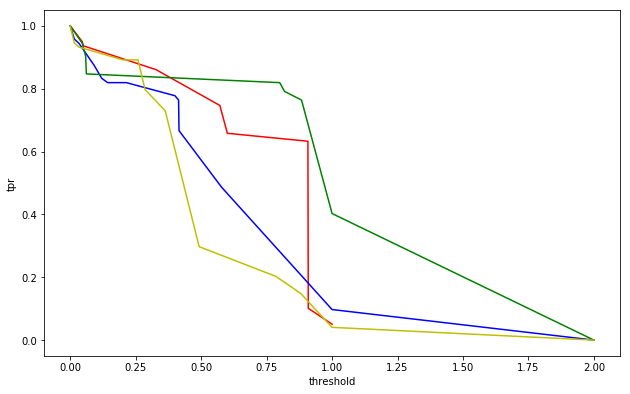

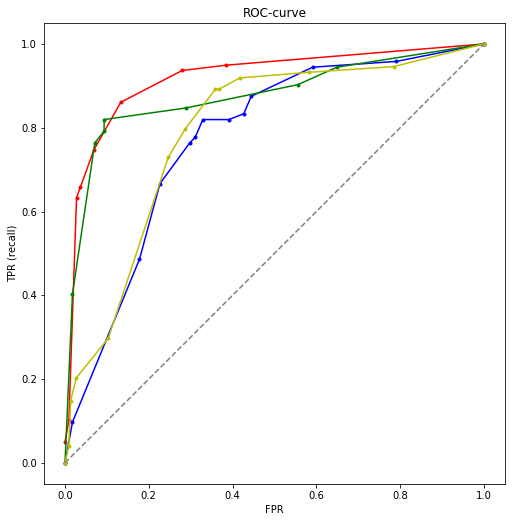

F1_score:  [0.77124183 0.49411765 0.77631579 0.3697479 ]


In [26]:
show_ROC (best_tree_clf_pca, X_test_pca, Y_test)

#### 2.6. Bagging.
Перейдем к ансамблям. 

Для построения ансамбля воспользуемся Bagging'ом с числом алгоритмов от 2 до 50. В качестве первого семейства базовых алгоримтов будем использовать линейные модели (т.е. логистическую регрессию), в качестве второго - решающие деревья. 

*Пояснение: Будем строить ансамбль только из моделей из одного семейства, т.е. логистическая регрессия не смешивается с решающими деревьями.*

Для этого можно сгенерировать с помощью метода bootstrap 50 подвыборок из `train` выборки (того же размера, что и исходная), обучить логистическую регрессию и решающее дерево с оптимальными параметрами из предыдущего пункта на каждой из подвыборок и затем усреднить предсказания k моделей.

*Hint: в sklearn может найтись подходящая функция, которая облегчит вам реализацию данного пункта.*

* Постройте график качества классификации и f1-score на `train` и `test` датасетах в зависимости от числа алгоритмов, вошедших в ансамбль.

* Проанализируйте график. Какое количество моделей стоит использовать? Как вы думаете, являются ли параметры решающего дерева, подобранные в предыдущем пункте оптимальными в данном случае?

In [27]:
linear_clf_array = []

for n_estimators in range (1, 51):
    linear_clf_array.append(BaggingClassifier(best_lin_clf, n_estimators=n_estimators))
    
# linear classification
accuracy_lin_train = []
f1_score_lin_train = []
accuracy_lin_test = []
f1_score_lin_test = []

for lin_clf in linear_clf_array:
    lin_clf.fit (X_train, Y_train)
    
    prediction_train = lin_clf.predict (X_train)
    prediction_test  = lin_clf.predict (X_test)
    
    accuracy_lin_train.append(accuracy_score(Y_train, prediction_train))
    f1_score_lin_train.append(f1_score      (Y_train, prediction_train, average=None))
    accuracy_lin_test .append(accuracy_score(Y_test , prediction_test ))
    f1_score_lin_test .append(f1_score      (Y_test , prediction_test , average=None))

    

In [28]:
tree_clf_array = []

for n_estimators in range (1, 51):
    tree_clf_array.append(BaggingClassifier(best_tree_clf, n_estimators=n_estimators))

    
# tree not regression
accuracy_tree_train = []
f1_score_tree_train = []
accuracy_tree_test = []
f1_score_tree_test = []

for tree_clf in tree_clf_array:
    tree_clf.fit (X_train, Y_train)
    
    prediction_train = tree_clf.predict (X_train)
    prediction_test  = tree_clf.predict (X_test)
    
    accuracy_tree_train.append(accuracy_score(Y_train, prediction_train))
    f1_score_tree_train.append(f1_score      (Y_train, prediction_train, average=None))
    accuracy_tree_test .append(accuracy_score(Y_test , prediction_test ))
    f1_score_tree_test .append(f1_score      (Y_test , prediction_test , average=None))
    

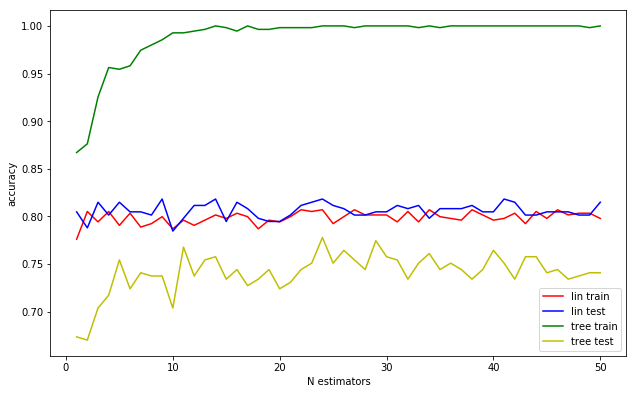

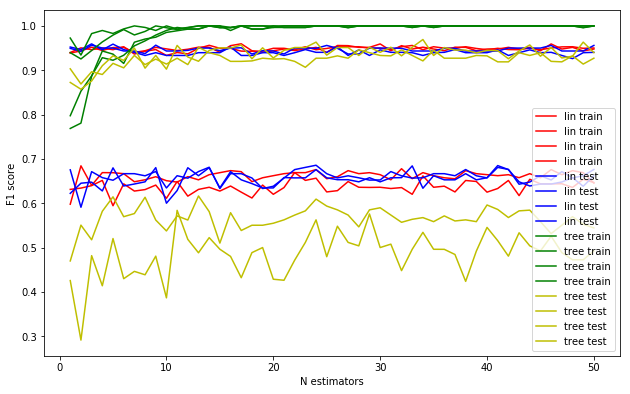

In [29]:
# accuracy
fig1 = plt.figure(figsize=(10, 6))

axes = fig1.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(range(1, 51), accuracy_lin_train , color='r', label = 'lin train')
axes.plot(range(1, 51), accuracy_lin_test  , color='b', label = 'lin test')
axes.plot(range(1, 51), accuracy_tree_train, color='g', label = 'tree train')
axes.plot(range(1, 51), accuracy_tree_test , color='y', label = 'tree test')


axes.set_xlabel('N estimators')
axes.set_ylabel('accuracy')
plt.legend(loc="lower right")

plt.show()
    
# f1_score
fig1 = plt.figure(figsize=(10, 6))

axes = fig1.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(range(1, 51), f1_score_lin_train , color='r', label = 'lin train')
axes.plot(range(1, 51), f1_score_lin_test  , color='b', label = 'lin test')
axes.plot(range(1, 51), f1_score_tree_train, color='g', label = 'tree train')
axes.plot(range(1, 51), f1_score_tree_test , color='y', label = 'tree test')


axes.set_xlabel('N estimators')
axes.set_ylabel('F1 score')
plt.legend(loc="lower right")

plt.show()
    
    

#### 2.7. Random Forest.
Теперь воспользуйтесь `sklearn`-реализацией алгоритма Random Forest. 

* Постройте аналогичные графики для него (изменяя число деревьев от 1 до 50). Остальные параметры можно оставить по умолчанию.

* Проанализируйте полученные результаты. Каким получилось оптимальное число деревьев. Как оно соотносится с оптимальным числом деревьев и линейных моделей в bagging'е из предыдущего пункта?

In [30]:
# YOUR CODE HERE

rand_tree_clf_array = []
for n_trees in range (1, 51):
    rand_tree_clf_array.append(RandomForestClassifier(n_estimators=n_trees))
    
    
accuracy_rand_train = []
f1_score_rand_train = []
accuracy_rand_test = []
f1_score_rand_test = []

for rand_clf in rand_tree_clf_array:
    rand_clf.fit (X_train, Y_train)
    
    prediction_train = rand_clf.predict (X_train)
    prediction_test  = rand_clf.predict (X_test)
    
    accuracy_rand_train.append(accuracy_score(Y_train, prediction_train))
    f1_score_rand_train.append(f1_score      (Y_train, prediction_train, average=None))
    accuracy_rand_test .append(accuracy_score(Y_test , prediction_test ))
    f1_score_rand_test .append(f1_score      (Y_test , prediction_test , average=None))


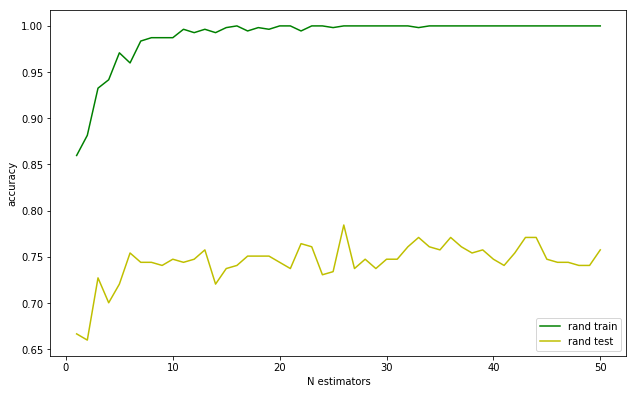

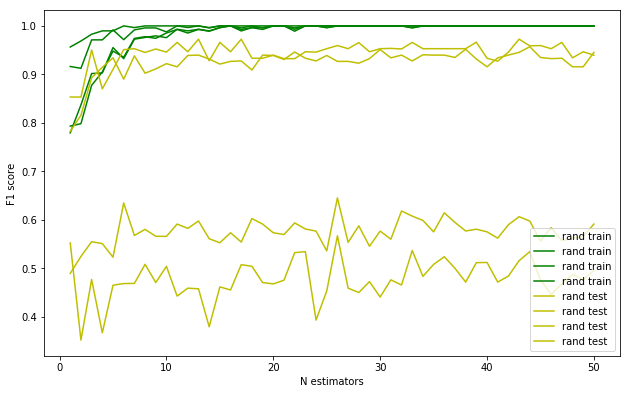

In [31]:
# accuracy
fig1 = plt.figure(figsize=(10, 6))

axes = fig1.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(range(1, 51), accuracy_rand_train, color='g', label = 'rand train')
axes.plot(range(1, 51), accuracy_rand_test , color='y', label = 'rand test')

axes.set_xlabel('N estimators')
axes.set_ylabel('accuracy')
plt.legend(loc="lower right")

plt.show()
    
# f1_score
fig1 = plt.figure(figsize=(10, 6))

axes = fig1.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(range(1, 51), f1_score_rand_train, color='g', label = 'rand train')
axes.plot(range(1, 51), f1_score_rand_test , color='y', label = 'rand test')


axes.set_xlabel('N estimators')
axes.set_ylabel('F1 score')
plt.legend(loc="lower right")

plt.show()
    

#### 2.8. Кривая обучения.
* Поделите обучающую выборку на 10 примерно равных частей. Обучите логистическую регрессию (с оптимальными параметрами), решающее дерево (аналогично), бэггинг над логистическими регрессиями и решающими деревьями (с выбранными параметрами) и RandomForest (из предыдущего пункта) на одной, двух, трех и т.д. частях.

* Постройти график f1-score и accuracy на `train` и `test` датасетах в зависимости от размера обучающей выборки.

* Проанализируйте полученный график. Можно ли сделать из него какие-либо выводы? Если да - кратко опишите их.

In [32]:
# YOUR CODE HERE
N_PARTICIPATIONS = 10

bagging_lin_clf  = linear_clf_array   [49]
bagging_tree_clf = tree_clf_array     [49]
rand_tree_clf    = rand_tree_clf_array[49]

accuracy = {'lin'       : [],
            'tree'      : [],
            'bag_lin'   : [],
            'bag_tree'  : [],
            'rand_tree' : []}

F1_score = {'lin'       : [],
            'tree'      : [],
            'bag_lin'   : [],
            'bag_tree'  : [],
            'rand_tree' : []}

print (X_train.shape)
print (Y_train.shape)

for part_sample in range(N_PARTICIPATIONS):
    X_train_loc = X_train[0:int (X_train.shape[0]*(part_sample+1)/N_PARTICIPATIONS), :]
    Y_train_loc = Y_train[0:int (X_train.shape[0]*(part_sample+1)/N_PARTICIPATIONS)]
    
    best_lin_clf    .fit (X_train_loc, Y_train_loc)
    best_tree_clf   .fit (X_train_loc, Y_train_loc)
    bagging_lin_clf .fit (X_train_loc, Y_train_loc)
    bagging_tree_clf.fit (X_train_loc, Y_train_loc)
    rand_tree_clf   .fit (X_train_loc, Y_train_loc)
    
    prediction_lin       = best_lin_clf    .predict (X_test)
    prediction_tree      = best_tree_clf   .predict (X_test)
    prediction_bag_lin   = bagging_lin_clf .predict (X_test)
    prediction_bag_tree  = bagging_tree_clf.predict (X_test)
    prediction_rand_tree = rand_tree_clf   .predict (X_test)
    
    accuracy['lin'      ].append(accuracy_score(Y_test, prediction_lin      ))
    accuracy['tree'     ].append(accuracy_score(Y_test, prediction_tree     ))
    accuracy['bag_lin'  ].append(accuracy_score(Y_test, prediction_bag_lin  ))
    accuracy['bag_tree' ].append(accuracy_score(Y_test, prediction_bag_tree ))
    accuracy['rand_tree'].append(accuracy_score(Y_test, prediction_rand_tree))
    
    F1_score['lin'      ].append(f1_score      (Y_test, prediction_lin      , average=None))
    F1_score['tree'     ].append(f1_score      (Y_test, prediction_tree     , average=None))
    F1_score['bag_lin'  ].append(f1_score      (Y_test, prediction_bag_lin  , average=None))
    F1_score['bag_tree' ].append(f1_score      (Y_test, prediction_bag_tree , average=None))
    F1_score['rand_tree'].append(f1_score      (Y_test, prediction_rand_tree, average=None))
    
    
    
    
    
    

(549, 19)
(549,)


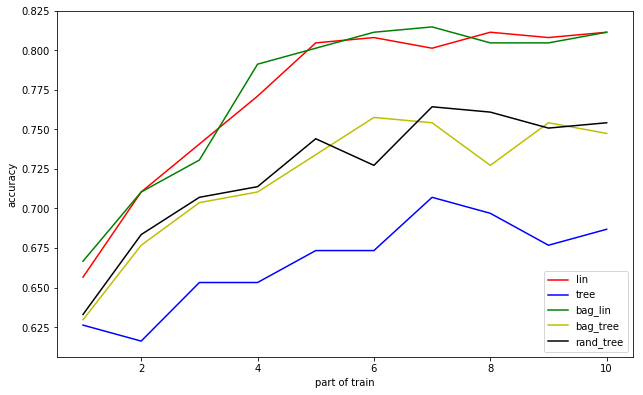

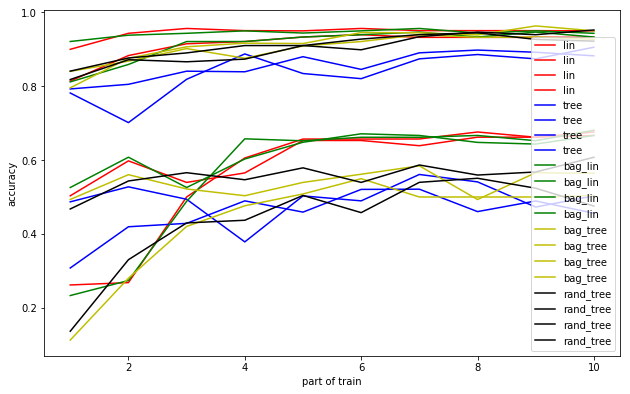

In [33]:
#accuracy
fig1 = plt.figure(figsize=(10, 6))

axes = fig1.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(range(1, 11), accuracy['lin'      ] , color='r'    , label = 'lin'      )
axes.plot(range(1, 11), accuracy['tree'     ] , color='b'    , label = 'tree'     )
axes.plot(range(1, 11), accuracy['bag_lin'  ] , color='g'    , label = 'bag_lin'  )
axes.plot(range(1, 11), accuracy['bag_tree' ] , color='y'    , label = 'bag_tree' )
axes.plot(range(1, 11), accuracy['rand_tree'] , color='black', label = 'rand_tree')


axes.set_xlabel('part of train')
axes.set_ylabel('accuracy')
plt.legend(loc="lower right")

plt.show()

# F1_score
fig1 = plt.figure(figsize=(10, 6))

axes = fig1.add_axes([0.1, 0.1, 0.8, 0.8])

axes.plot(range(1, 11), F1_score['lin'      ] , color='r'    , label = 'lin'      )
axes.plot(range(1, 11), F1_score['tree'     ] , color='b'    , label = 'tree'     )
axes.plot(range(1, 11), F1_score['bag_lin'  ] , color='g'    , label = 'bag_lin'  )
axes.plot(range(1, 11), F1_score['bag_tree' ] , color='y'    , label = 'bag_tree' )
axes.plot(range(1, 11), F1_score['rand_tree'] , color='black', label = 'rand_tree')


axes.set_xlabel('part of train')
axes.set_ylabel('accuracy')
plt.legend(loc="lower right")

plt.show()

#### Линейные модели и ансамбли линейных моделей выбивают на данном датасете лучший скор

Вторая часть задания про SVM ждет вас в соседнем ноутбуке.